In [21]:
import pandas as pd
import numpy as np
np.random.seed(111)
import matplotlib.pyplot as plt
from scipy.stats import geom

In [2]:
k = 30
N = 40
rolls = geom(p:=1/N).rvs(1000)

In [3]:
rolls.mean()

39.35

In [4]:
rolls.max()

298

In [5]:
Completed_trials = rolls<=k
Completed_trials[:10]

array([False,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [6]:
S = Completed_trials.mean()
S

0.554

In [7]:
def estimate_p(S,k):
    return 1-(1-S)**(1/k)

In [8]:
estimate_p(S,k)

0.026555575589116476

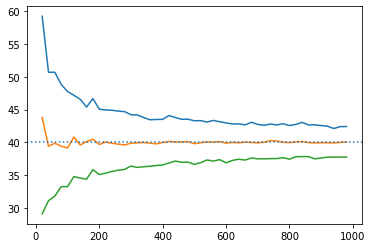

In [9]:
def xyz(p, k):
    n_boostraps = 500
    lo, hi, mid = [], [], []
    n_trials = np.arange(20, 1000, 20)
    for n in n_trials:
        x = [(geom(p).rvs(n)<=k).mean() for _ in range(n_boostraps)]
        lo.append(np.percentile(x, 10))
        hi.append(np.percentile(x, 90))
        mid.append(np.percentile(x,50))
        
    return n_trials, lo, mid, hi

n_trials, lo, mid, hi = xyz(p, k)
[plt.plot(n_trials, [1/estimate_p(i, k) for i in j]) for j in [lo,mid,hi]]


plt.axhline(N, linestyle = 'dotted');

        

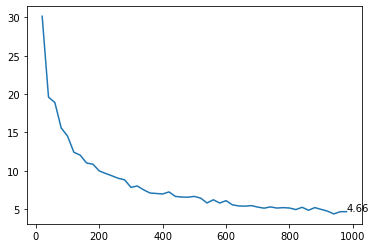

In [10]:
credibile_interval = np.array([1/estimate_p(i,k) for i in lo])-np.array([1/estimate_p(i,k) for i in hi])
plt.plot(n_trials, credibile_interval)
plt.annotate(f'{credibile_interval[-1]:0.2f}', (n_trials[-1],credibile_interval[-1]));

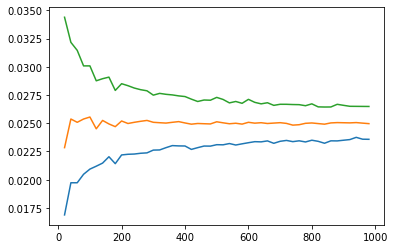

In [11]:
[plt.plot(n_trials, [estimate_p(i, k) for i in j]) for j in [lo,mid,hi]];

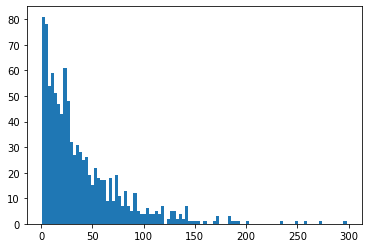

In [12]:
y,x,_ = plt.hist(rolls, bins = 100);

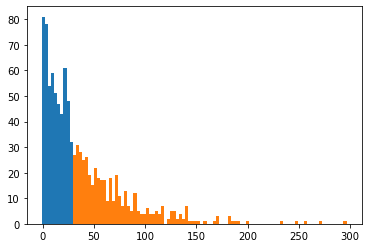

In [13]:
x = x[:(len(y))]
plt.bar(x[x<=k],y[x<=k], width=x[1]-x[0])
plt.bar(x[x>k],y[x>k], width=x[1]-x[0]);

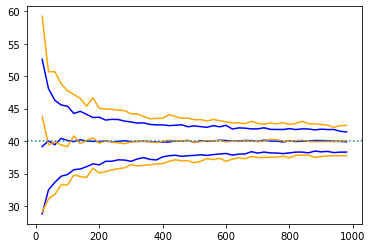

In [14]:
def xyz2(p, k):
    n_boostraps = 500
    lo, hi, mid = [], [], []
    n_trials = np.arange(20, 1000, 20)
    for n in n_trials:
        x = [geom(p).rvs(n).mean() for _ in range(n_boostraps)]
        lo.append(np.percentile(x, 10))
        hi.append(np.percentile(x, 90))
        mid.append(np.percentile(x,50))
        
    return n_trials, lo, mid, hi

n_trials2, lo2, mid2, hi2 = xyz2(p, k)
[plt.plot(n_trials, j, color = 'blue') for j in [lo2,mid2,hi2]]


[plt.plot(n_trials, [1/estimate_p(i, k) for i in j], color='orange') for j in [lo,mid,hi]];


plt.axhline(N, linestyle = 'dotted');

In [15]:
rolls.sum()

39350

In [16]:
rolls.clip(max=k).sum()

20921

In [20]:
(rolls[rolls>k].mean())/k, (rolls<=k).mean()

(2.377354260089686, 0.545)

In [102]:
# N = 40
# for k in range(N//4:1+N*4):
def experiment(N,k,trials):
    rolls = geom(1/N).rvs(trials)
    ideal_result = rolls.mean()
    N_ideal = rolls.sum()
    simplified_result = 1/estimate_p((rolls<=k).mean(),k)
    simplified_rolls = rolls.clip(max=k).sum()
    completion_rate = (rolls<=k).mean()
    lindy_value = (rolls[rolls>k]).mean()
    lindy_ratio = lindy_value/k
    alpha = lindy_ratio/completion_rate
    beta = lindy_ratio/(1-completion_rate)
    ideal_lindy_value = k+N
    estimated_lindy_value = simplified_result + k
    lindy_estimation = ((rolls[rolls<=k]).sum() + estimated_lindy_value*((rolls>k).sum()))/trials
    return {'N':N,
            'k':k,
            'ideal_result':ideal_result,
            'lindy_estimation': lindy_estimation,
            'N_ideal':N_ideal,
            'simple_result':simplified_result,
            'simple_rolls':simplified_rolls,
            'completion_rate':completion_rate,
            'lindy_value':lindy_value,
            'lindy_ratio': lindy_ratio,
            'ideal_lindy_value':ideal_lindy_value,
            'estimated_lindy_value':estimated_lindy_value,
            'alpha':alpha,
            'beta':beta}
    

In [103]:
# N = 40
df = pd.DataFrame([experiment(N,k,100000) for k in range(N//4,1+N*4) for N in range(20,40,2)])
                  
df
                  
    

,N,k,ideal_result,lindy_estimation,N_ideal,simple_result,simple_rolls,completion_rate,lindy_value,lindy_ratio,ideal_lindy_value,estimated_lindy_value,alpha,beta
0,20,10,19.99304,19.995919,1999304,19.981801,803781,0.40155,29.976991,2.997699,30,29.981801,7.465320,5.009105
1,22,10,22.06437,22.041695,2206437,22.048683,818035,0.37133,32.084750,3.208475,32,32.048683,8.640495,5.103592
2,24,10,23.99642,24.020193,2399642,24.025353,831530,0.34632,33.988985,3.398899,34,34.025353,9.814329,5.199637
3,26,10,26.15868,25.975605,2615868,25.962120,844676,0.32483,36.233275,3.623327,36,35.962120,11.154535,5.366541
4,28,10,28.08678,28.069358,2808678,28.069087,854029,0.30425,38.094129,3.809413,38,38.069087,12.520667,5.475261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,30,160,29.91442,29.918005,2991442,29.751741,2979275,0.99579,188.900238,1.180626,190,189.751741,1.185618,280.433844
1506,32,160,31.93812,31.941836,3193812,31.654119,3175571,0.99412,191.022109,1.193888,192,191.654119,1.200950,203.042208
1507,34,160,34.13202,34.131886,3413202,34.127782,3383907,0.99142,194.143357,1.213396,194,194.127782,1.223897,141.421443
1508,36,160,35.93554,35.957932,3593554,35.980169,3556215,0.98900,193.944545,1.212153,196,195.980169,1.225635,110.195764


In [104]:
df.describe()

,N,k,ideal_result,lindy_estimation,N_ideal,simple_result,simple_rolls,completion_rate,lindy_value,lindy_ratio,ideal_lindy_value,estimated_lindy_value,alpha,beta
count,1510.000000,1510.00000,1510.000000,1510.000000,1.510000e+03,1510.000000,1.510000e+03,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,29.000000,85.00000,28.999357,28.999690,2.899936e+06,28.997187,2.489869e+06,0.865578,114.002345,1.542912,114.000000,113.997187,2.148531,139.738054
std,5.746466,43.60343,5.746441,5.747954,5.746441e+05,5.746990,6.613298e+05,0.175625,43.998776,0.527827,43.980461,43.976139,2.059256,386.588888
min,20.000000,10.00000,19.821490,19.817053,1.982149e+06,19.020281,8.037810e+05,0.234240,29.976991,1.100166,30.000000,29.981801,1.100694,4.861835
25%,24.000000,47.00000,24.004620,24.001431,2.400462e+06,24.012788,2.006356e+06,0.809867,76.089285,1.237857,76.000000,76.019259,1.254305,8.459372
50%,29.000000,85.00000,28.973685,28.954795,2.897368e+06,28.991435,2.493338e+06,0.949775,113.836137,1.341314,114.000000,113.965837,1.411623,26.666249
75%,34.000000,123.00000,34.004685,34.010016,3.400468e+06,34.004577,2.980574e+06,0.986810,151.517675,1.613859,152.000000,152.073835,1.992132,93.415909
max,38.000000,160.00000,38.300190,38.603484,3.830019e+06,38.610267,3.747118e+06,0.999730,198.563322,4.819458,198.000000,197.915247,20.574871,4232.432151


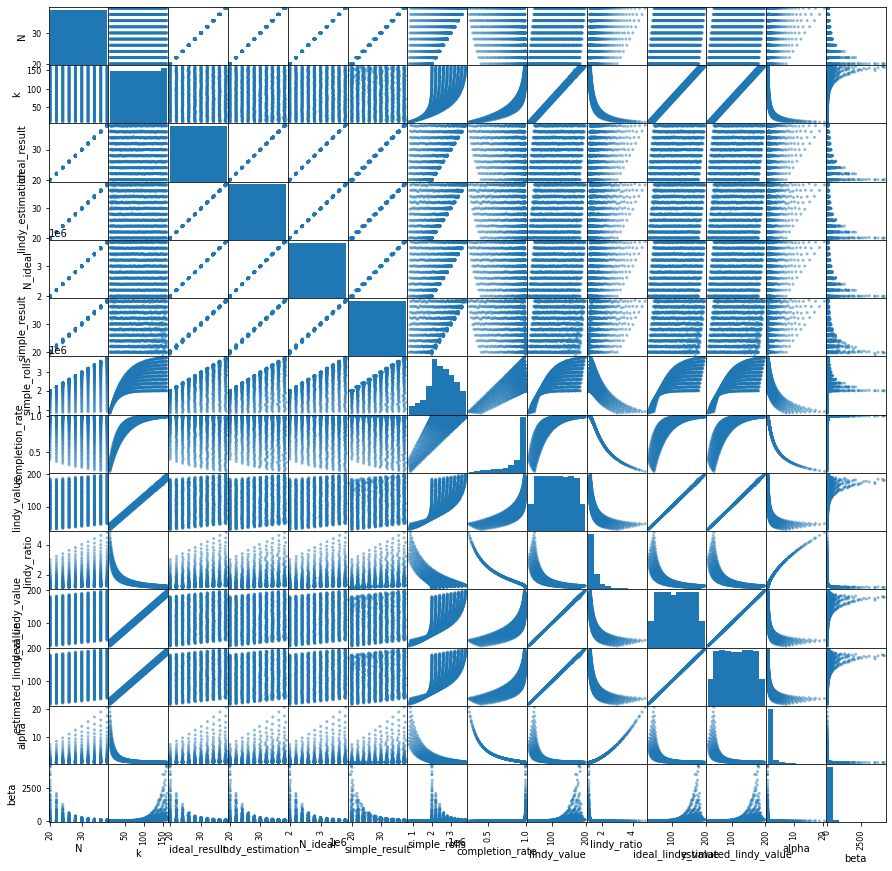

In [105]:

pd.plotting.scatter_matrix(df,figsize=(15,15));

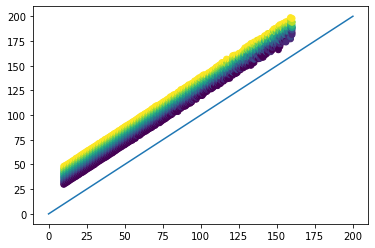

In [106]:
plt.scatter(df['k'],df['lindy_value'], c=df['N'])
plt.plot([0,200],[0,200]);


In [107]:
from sklearn.linear_model import LinearRegression as LR

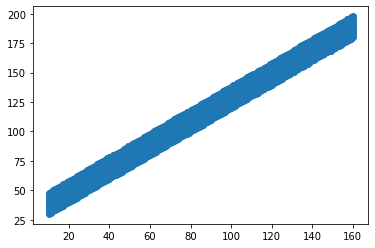

In [108]:
plt.scatter(df['k'],df['estimated_lindy_value'])

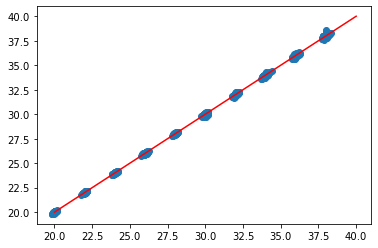

In [109]:
plt.scatter(df['ideal_result'],df['lindy_estimation'])
plt.plot([20,40],[20,40], color = 'red')

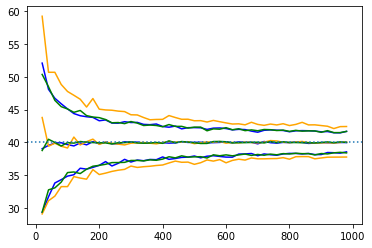

In [112]:
def xyz3(p, k):
    n_boostraps = 500
    lo, hi, mid = [], [], []
    n_trials = np.arange(20, 1000, 20)
    for n in n_trials:
        x = [experiment(1/p,k,n)['lindy_estimation'] for _ in range(n_bootstraps)]
#         x = [geom(p).rvs(n).mean() for _ in range(n_boostraps)]
        lo.append(np.percentile(x, 10))
        hi.append(np.percentile(x, 90))
        mid.append(np.percentile(x,50))
        
    return n_trials, lo, mid, hi

n_trials3, lo3, mid3, hi3 = xyz2(p, k)

[plt.plot(n_trials, j, color = 'blue') for j in [lo2,mid2,hi2]]
[plt.plot(n_trials, [1/estimate_p(i, k) for i in j], color='orange') for j in [lo,mid,hi]];
[plt.plot(n_trials, j, color = 'green') for j in [lo3,mid3,hi3]]

plt.axhline(N, linestyle = 'dotted');

In [114]:
rolls.mean()

39.35

In [119]:
observed = rolls[rolls<=k].sum()
observed

7541

In [131]:
S = (rolls<=k).mean()
S

0.554

In [135]:
estimated_N = 1/(1-(1-S)**(1/k))
estimated_N

37.65687535727297

In [137]:
imputed_values = (k+estimated_N)*((rolls>k).sum())
imputed_values

30174.96640934375

In [138]:
(observed + imputed_values)/len(rolls)

37.71596640934374

In [141]:
rolls_x = np.where(rolls>k, N+k,rolls)
rolls_x.mean()

38.761

Suppose you have a die with and unkown number of sides $N$. All sides are labeled 'Tails', except for one side labeled 'Heads'.

You wish to determine how many sides the die has (or, to put it another way, the probability $p$ of rolling Heads on any given roll, where $p = \frac{1}{N}$

To determine the number of sides, you roll the die until you get Heads and record the number of rolls required. You then repeat this experiment multiple times and take the average of the recorded values which will be N.

However, for some reason, there is an arbitrary limit to the number of times you can roll the die in one trial. We'll call this value $k$. If you obtain a Heads in $k$ or fewer rolls, you record the actual number of rolls.
If a Heads is not achieved after $k$ rolls, you record  the result as an estimated result:

$$\text{estimated result} = k+\frac{1}{1-(\text{Null Result Rate})^{(\frac{1}{k})}}$$

You then take the average of all results estimated and actual to compute the number of sides.

For example, if we have 30-sided die and a cut-off of 40 rolls and we run the test 200 times, we might get the following results:
* 152 trials ended with a Heads in $k$ or fewer rolls.
* the average number of rolls for these was 16.8
* 48 trials ended after $k$ rolls with no Heads observed
* The *Null Result Rate* = $\frac{48}{200} = 0.24$
* The estimated value for null results is:

$$\text{estimated result} = 40+\frac{1}{1-(\text{0.24})^{(\frac{1}{40})}}$$

$$\text{estimated result} = 68.53$$

Therefore, our estimate of the number of sides is:

$$N_{estimated} = \frac{\sum \text{actual results} + (\text{estimated result}\cdot \text{number of null results})}{trials}$$

$$N_{estimated} = \frac{(152\cdot16.8) + (48\cdot68.53)}{200}$$

$$N_{estimated} = 29.22$$

Which compares favorably to the true value of 30.

In [230]:
((152*(16.8)+(48)*(68.53))/200)

29.2152

In [225]:
40 + (1/(1-(.24)**(1/40)))

68.5315216035655

In [213]:
N = 30
k = 40
rolls = geom(1/N).rvs(200).astype(float)
rolls[rolls>k]=np.nan
actual = rolls[~np.isnan(rolls)]
actual

array([28., 36.,  9., 19., 12., 27., 12., 28., 10., 30.,  7., 20., 23.,
        7., 11., 24.,  2., 10., 22.,  4.,  3., 11., 10.,  2., 40., 24.,
       21., 26., 29., 10.,  4., 18., 33., 26.,  8., 16.,  7., 17., 14.,
        2., 34., 14.,  5.,  1., 18., 40., 21.,  2., 23.,  3., 31., 16.,
       38., 10., 32.,  2.,  5., 12.,  3., 30.,  2.,  1., 16.,  2.,  9.,
        2.,  9., 23., 17., 37., 36., 12., 35., 19., 18.,  5., 38.,  2.,
       10., 22.,  1.,  7., 23., 17., 10.,  5., 14., 26.,  4., 16.,  2.,
        9.,  8.,  9., 26., 19., 38., 21., 27.,  2., 12.,  2., 39.,  5.,
       19.,  1., 13., 39., 23., 15.,  7.,  6.,  9.,  9., 18., 17., 18.,
       27., 23., 15., 39.,  5., 25., 20., 10., 17., 20., 30.,  2., 15.,
       22.,  2.,  4., 35.,  8.,  4., 27., 11., 25.,  6.,  1.,  5., 10.,
        6.,  4.,  8., 34., 16., 19.,  5., 14.,  4.])

In [224]:
1-len(actual)/200

0.24

In [222]:
actual.mean()

15.598684210526315

In [215]:
null_result_rate = np.isnan(rolls).mean()
null_result_rate

0.24

In [216]:
estimate = k + (1/(1-null_result_rate**(1/k)))
estimate

68.5315216035655

In [217]:
imputed = np.where(np.isnan(rolls), estimate, rolls)
imputed

array([68.5315216, 28.       , 36.       ,  9.       , 19.       ,
       12.       , 27.       , 12.       , 28.       , 10.       ,
       30.       ,  7.       , 20.       , 68.5315216, 68.5315216,
       23.       ,  7.       , 11.       , 24.       , 68.5315216,
        2.       , 10.       , 22.       ,  4.       , 68.5315216,
        3.       , 11.       , 68.5315216, 68.5315216, 10.       ,
        2.       , 68.5315216, 40.       , 24.       , 21.       ,
       68.5315216, 26.       , 29.       , 10.       ,  4.       ,
       68.5315216, 18.       , 33.       , 26.       ,  8.       ,
       68.5315216, 16.       , 68.5315216, 68.5315216,  7.       ,
       17.       , 14.       ,  2.       , 34.       , 14.       ,
       68.5315216, 68.5315216,  5.       ,  1.       , 68.5315216,
       18.       , 68.5315216, 40.       , 21.       ,  2.       ,
       68.5315216, 23.       ,  3.       , 68.5315216, 31.       ,
       16.       , 38.       , 10.       , 32.       ,  2.    

In [218]:
imputed.mean()

28.302565184855716

In [250]:
import numpy as np
from scipy.stats import geom

def proof(N, k, n_trials):
    p = 1/N
    rolls = geom(p).rvs(n_trials)
    null_result_rate = (rolls>k).mean()
    estimated_result = k+(1/(1-null_result_rate**(1/k)))
    rolls = np.where(rolls<=k, rolls, estimated_result)
    
    #returns the ratio of the estimated result to the true result
    return rolls.mean()/N

x = np.array([proof(N,k,10000) for N in range(30,3000,20) for k in range(30,3000,20)])
x.min(), x.max(), x.mean(), len(x)

(0.7593330348227468, 1.229100217095156, 1.0001908825216486, 22201)

In [242]:
proof(400, 600, 10000)

(402.7757624419236, 1.006939406104809)

In [244]:
x = [proof(N,k,10000) for N in range(30,3000,10) for k in range(30,3000,10)]

In [245]:
len(x)

88209

In [246]:
x

[(29.485682001037528, 0.9828560667012509),
 (30.043935849643987, 1.0014645283214663),
 (29.648130954339187, 0.9882710318113063),
 (30.0265055363075, 1.0008835178769167),
 (29.951575657047062, 0.9983858552349021),
 (29.499217202305722, 0.9833072400768574),
 (29.972091956553, 0.9990697318851001),
 (29.532266583483718, 0.984408886116124),
 (29.94185101616971, 0.9980617005389903),
 (30.04590074652836, 1.0015300248842787),
 (29.940515919484138, 0.9980171973161379),
 (30.140024616928415, 1.0046674872309471),
 (29.83056909160553, 0.9943523030535176),
 (29.880088930603907, 0.9960029643534636),
 (30.333165296630998, 1.0111055098877),
 (29.78603378345028, 0.9928677927816759),
 (29.95666864011375, 0.998555621337125),
 (29.8655469605427, 0.9955182320180901),
 (30.124772904920654, 1.0041590968306884),
 (29.947594846416848, 0.9982531615472283),
 (29.64635975595507, 0.9882119918651691),
 (29.762336250874505, 0.9920778750291501),
 (29.805264647516292, 0.9935088215838764),
 (29.976373209329417, 0.99921

1.000177645986966

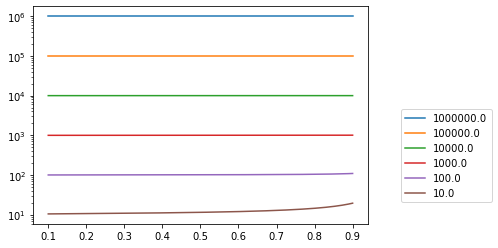

In [281]:
for k in np.logspace(1,6,6)[::-1]:
    nrr = np.linspace(.1,.9,1000)
    plt.plot(nrr,(k+1/(1-(nrr)**(1/k))/k), label=k)
plt.legend(loc=(1.1,.1))
plt.yscale('log');